In [66]:
# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 7

# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [67]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

# 向量也用二维列表表示
C = [[1],
     [2],
     [3]]

#TODO 创建一个 4*4 单位矩阵
I = [[1,0,0,0],
     [0,1,0,0],
     [0,0,1,0],
     [0,0,0,1]]

## 1.2 返回矩阵的行数和列数

In [68]:
# TODO 返回矩阵的行数和列数
def shape(M):
    if isinstance(M, list) and isinstance(M[0], list):
        row = len(M)    
        column = len(M[0])
        return row, column
    else:
        raise AttributeError

In [69]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [70]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    for i in range(len(M)):
        for j in range(len(M[i])):
            M[i][j] = round(M[i][j], decPts)
    #not working        
#     M = [[round(e, decPts) for e in row] for row in M]

In [71]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


## 1.4 计算矩阵的转置

In [110]:
def make_matrix(num, row, column):
    '''生成所有元素都是固定数字的矩阵'''
    M = [0] * row
    for i in range(row):
        M[i] = [num] * column
    return M
    
    #warning 这种方式复制了数组的reference 会产生错误
#     return [[num]*column]*row

make_matrix(10, 4, 3)

[[10, 10, 10], [10, 10, 10], [10, 10, 10], [10, 10, 10]]

In [112]:
M = make_matrix(10,2,3)
M

[[10, 10, 10], [10, 10, 10]]

In [113]:
M[0][0] = 5
M

[[5, 10, 10], [5, 10, 10]]

In [73]:
# TODO 计算矩阵的转置
# def transpose(M):
    
#     # 生成容器
#     l, r = shape(M)
#     T = make_matrix(0, r, l)
    
#     # 转置矩阵
#     for i in range(len(M)):
#         for j in range(len(M[i])):
#             T[j][i] = M[i][j]
            
#     return T

# 更简便的方式
def transpose(M):
    return [list(row) for row in zip(*M)]

In [74]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.010s

OK


## 1.5 计算矩阵乘法 AB

In [89]:
# TODO 计算矩阵乘法 AB，如果无法相乘则raise ValueError
def matxMultiply(A, B):
    
    # 确定 输入源可以进行运算
    lA, rA = shape(A)
    lB, rB = shape(B)
    if rA != lB:
        raise ValueError('operands could not be broadcast together')
        
        # 容器
    result = make_matrix(0, lA, rB)
        
        # 运算
    Bt = transpose(B)
    for i in range(lA):
        for j in range(rB):
            Ai = A[i]
            Bj = Bt[j]
            e = [a*b for (a, b) in zip(Ai, Bj)]
            e = sum(e)
            result[i][j] = e
            
    return result

In [91]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

F
FAIL: test_matxMultiply (__main__.LinearRegressionTestCase)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/April/Desktop/linear_algebra/the_project/test.py", line 60, in test_matxMultiply
    self.assertTrue((dotProduct == dp).all(),'Wrong answer')
AssertionError: False is not true : Wrong answer

----------------------------------------------------------------------
Ran 1 test in 0.004s

FAILED (failures=1)


---

# 2 Gaussign Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [92]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
    if len(A) == len(b):
        T = [A[i]+b[i] for i in range(len(A))]
    else:
        raise Exception("b with length {} can't be added to A with length {}".format(len(b),len(A)))
    return T

In [93]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [94]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
# def swapRows(M, r1, r2):
#     temp = M[r1]
#     M[r1] = M[r2]
#     M[r2] = temp

def swapRows(M, r1, r2):
    M[r1], M[r2] = M[r2], M[r1]

In [95]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


In [96]:
# TODO r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    if scale != 0:
        M[r] = [e*scale for e in M[r]]
    else:
        raise ValueError("scale can't be zero")

In [97]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [98]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    M[r1] = [M[r2][i]*scale+M[r1][i] for i in range(len(M[r1]))] 

In [99]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

**注：** 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演

为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为***可逆矩阵***，矩阵A为***奇异矩阵***两种情况。

#### 推演示例 


$Ab = \begin{bmatrix}
    -7 & 5 & -1 & 1\\
    1 & -3 & -8 & 1\\
    -10 & -2 & 9 & 1\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & \frac{1}{5} & -\frac{9}{10} & -\frac{1}{10}\\
    0 & -\frac{16}{5} & -\frac{71}{10} & \frac{11}{10}\\
    0 & \frac{32}{5} & -\frac{73}{10} & \frac{3}{10}\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & 0 & -\frac{43}{64} & -\frac{7}{64}\\
    0 & 1 & -\frac{73}{64} & \frac{3}{64}\\
    0 & 0 & -\frac{43}{4} & \frac{5}{4}\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & 0 & 0 & -\frac{3}{16}\\
    0 & 1 & 0 & -\frac{59}{688}\\
    0 & 0 & 1 & -\frac{5}{43}\end{bmatrix}$
    

#### 推演有以下要求:
1. 展示每一列的消元结果, 比如3*3的矩阵, 需要写三步
2. 用分数来表示
3. 分数不能再约分
4. 我们已经给出了latex的语法,你只要把零改成你要的数字(或分数)即可
5. 检查你的答案, 可以用[这个](http://www.math.odu.edu/~bogacki/cgi-bin/lat.cgi?c=sys), 或者后面通过单元测试后的`gj_Solve`

_你可以用python的 [fractions](https://docs.python.org/2/library/fractions.html) 模块辅助你的约分_

#### 以下开始你的尝试吧!

In [100]:
# 不要修改这里！
from helper import *
A = generateMatrix(3,seed,singular=False)
b = np.ones(shape=(3,1),dtype=int) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

  5, -6, -7 ||  1 
  9, -3,  4 ||  1 
 -2,  4,  0 ||  1 


请按照算法的步骤3，逐步推演***可逆矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵。

要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$


$ Ab = \begin{bmatrix}
    5 & -6 & -7 & 1 \\
    9 & -3 & 4 & 1 \\
    -2 & 4 & 0 & 1 \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & -\frac{1}{3} & \frac{4}{9} & \frac{1}{9} \\
    0 & -\frac{13}{3} & -\frac{83}{9} & \frac{4}{9} \\
    0 & \frac{10}{3} & \frac{8}{9} & \frac{11}{9} \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & \frac{15}{13} & \frac{1}{13} \\
    0 & 1 & \frac{83}{39} & -\frac{4}{39} \\
    0 & 0 & -\frac{242}{39} & \frac{61}{39} \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & 0 & \frac{89}{242} \\
    0 & 1 & 0 & \frac{105}{242} \\
    0 & 0 & 1 & -\frac{61}{242} \end{bmatrix}$

In [101]:
# 不要修改这里！
A = generateMatrix(3,seed,singular=True)
b = np.ones(shape=(3,1),dtype=int)
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

  0,  9,  8 ||  1 
  0, -6,  7 ||  1 
  0,  6,  6 ||  1 


请按照算法的步骤3，逐步推演***奇异矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵。

要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$


$ Ab = \begin{bmatrix}
    0 & 9 & 8 & 1 \\
    0 & -6 & 7 & 1 \\
    0 & 6 & 6 & 1 \end{bmatrix}$

$ --> \begin{bmatrix}
    0 & 0 & \frac{37}{2} & \frac{5}{2} \\
    0 & 1 & -\frac{7}{6} & -\frac{1}{6} \\
    0 & 0 & 13 & 2 \end{bmatrix}$
    
$ --> \begin{bmatrix}
    0 & 0 & 0 & -\frac{9}{26} \\
    0 & 1 & 0 & \frac{1}{78} \\
    0 & 0 & 1 & \frac{2}{13} \end{bmatrix}$

### 2.3.3 实现 Gaussian Jordan 消元法

In [102]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""

def gj_Solve(A, b, decPts=4, epsilon = 1.0e-16):
    
    def is_near_zero(num):
        return abs(num) < epsilon

    try:
        Ab = augmentMatrix(A, b)
        for i in range(len(Ab)):
            # 绝对值的最大值 变换
            maxNum = abs(Ab[i][i])
            maxI = i
            for j in range(i, len(Ab)):
                if abs(Ab[j][i]) > maxNum:
                    maxNum = abs(Ab[j][i])
                    maxI = j
            # 奇异矩阵
            if is_near_zero(maxNum):
                raise Exception('奇异矩阵')

            # 将绝对值最大值所在行交换到对角线元素所在行
            if maxI != i:
                swapRows(Ab, i, maxI)

            # 列c的对角线元素缩放为1
            coeffient = 1 / Ab[i][i]
            scaleRow(Ab, i, coeffient)

            # 多次使用第三个行变换，将列c的其他元素消为0
            for j in range(len(Ab)):
                if j != i and not is_near_zero(Ab[j][i]):
                    coeffient = - Ab[j][i]
                    addScaledRow(Ab, j, i, coeffient)
                    
        result = [[e[-1]] for e in Ab]
        matxRound(result, decPts)

        return result
    except:
        return None

In [103]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 2.580s

OK


## (选做) 2.4 算法正确判断了奇异矩阵：

在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：

# 3  线性回归

## 3.1 随机生成样本点

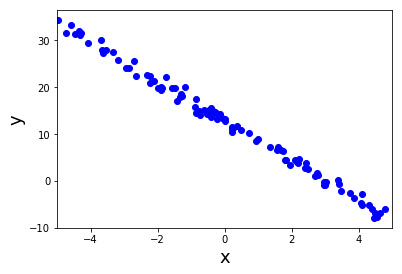

In [104]:
# 不要修改这里！
# 运行一次就够了！
from helper import *
from matplotlib import pyplot as plt
%matplotlib inline

X,Y = generatePoints(seed,num=100)

## 可视化
plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.show()

## 3.2 拟合一条直线

### 3.2.1 猜测一条直线

/Users/April/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


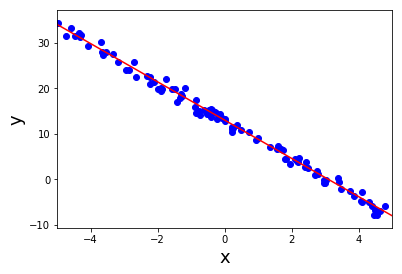

In [105]:
#TODO 请选择最适合的直线 y = mx + b
m1 = -4.2
b1 = 13

# 不要修改这里！
plt.xlim((-5,5))
x_vals = plt.axes().get_xlim()
y_vals = [m1*x+b1 for x in x_vals]
plt.plot(x_vals, y_vals, '-', color='r')

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')

plt.show()

### 3.2.2 计算平均平方误差 (MSE)

我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下：
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [106]:
# TODO 实现以下函数并输出所选直线的MSE

def calculateMSE(X,Y,m,b):
    result = [(y-m*x-b)**2 for x,y in zip(X,Y)]
    return  sum(result)/len(result)

print(calculateMSE(X,Y,m1,b1))

0.8852998952676149


### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差

你可以调整3.2.1中的参数 $m1,b1$ 让蓝点均匀覆盖在红线周围，然后微调 $m1, b1$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

**这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。**

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0. 

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$

### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

TODO 证明:

### 3.3.2 实例推演

现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

- 目标函数 $E$, 
- 二元二次方程组，
- 并求解最优参数 $m, b$

TODO 写出目标函数，方程组和最优参数

### 3.3.3 将方程组写成矩阵形式

我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 证明:

至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 **Normal Equation**，也有直观的几何意义。你可以在 [子空间投影](http://open.163.com/movie/2010/11/J/U/M6V0BQC4M_M6V2AJLJU.html) 和 [投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html) 看到更多关于这个方程的内容。

### 3.4 求解 $X^TXh = X^TY$ 

在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [109]:
# TODO 实现线性回归
'''
参数：X, Y 存储着一一对应的横坐标与纵坐标的两个一维数组
返回：m，b 浮点数
'''
def linearRegression(X,Y):
    Xx = augmentMatrix(transpose([X]),make_matrix(1,len(X),1))
    Yy = transpose([Y])
    Xt = transpose(Xx)
    A = matxMultiply(Xt, Xx)
    b = matxMultiply(Xt, Yy)
    
    result = gj_Solve(A, b)
    return result[0][0], result[1][0]

m2,b2 = linearRegression(X,Y)
assert isinstance(m2,float),"m is not a float"
assert isinstance(b2,float),"b is not a float"
print(m2,b2)

-4.2021 12.7878


你求得的回归结果是什么？
请使用运行以下代码将它画出来。

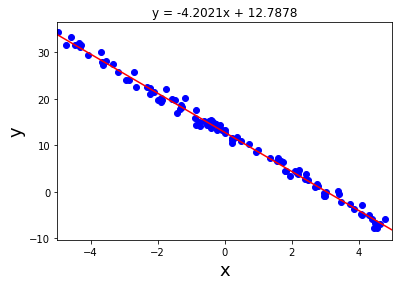

In [28]:
# 请不要修改下面的代码
x1,x2 = -5,5
y1,y2 = x1*m2+b2, x2*m2+b2

plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.plot((x1,x2),(y1,y2),'r')
plt.title('y = {m:.4f}x + {b:.4f}'.format(m=m2,b=b2))
plt.show()

你求得的回归结果对当前数据集的MSE是多少？

In [29]:
print(calculateMSE(X,Y,m2,b2))

0.8401259413730551
